<h1><center>Desafio Final - Trilha Engenheiro IA Microsoft 2021</center></h1>

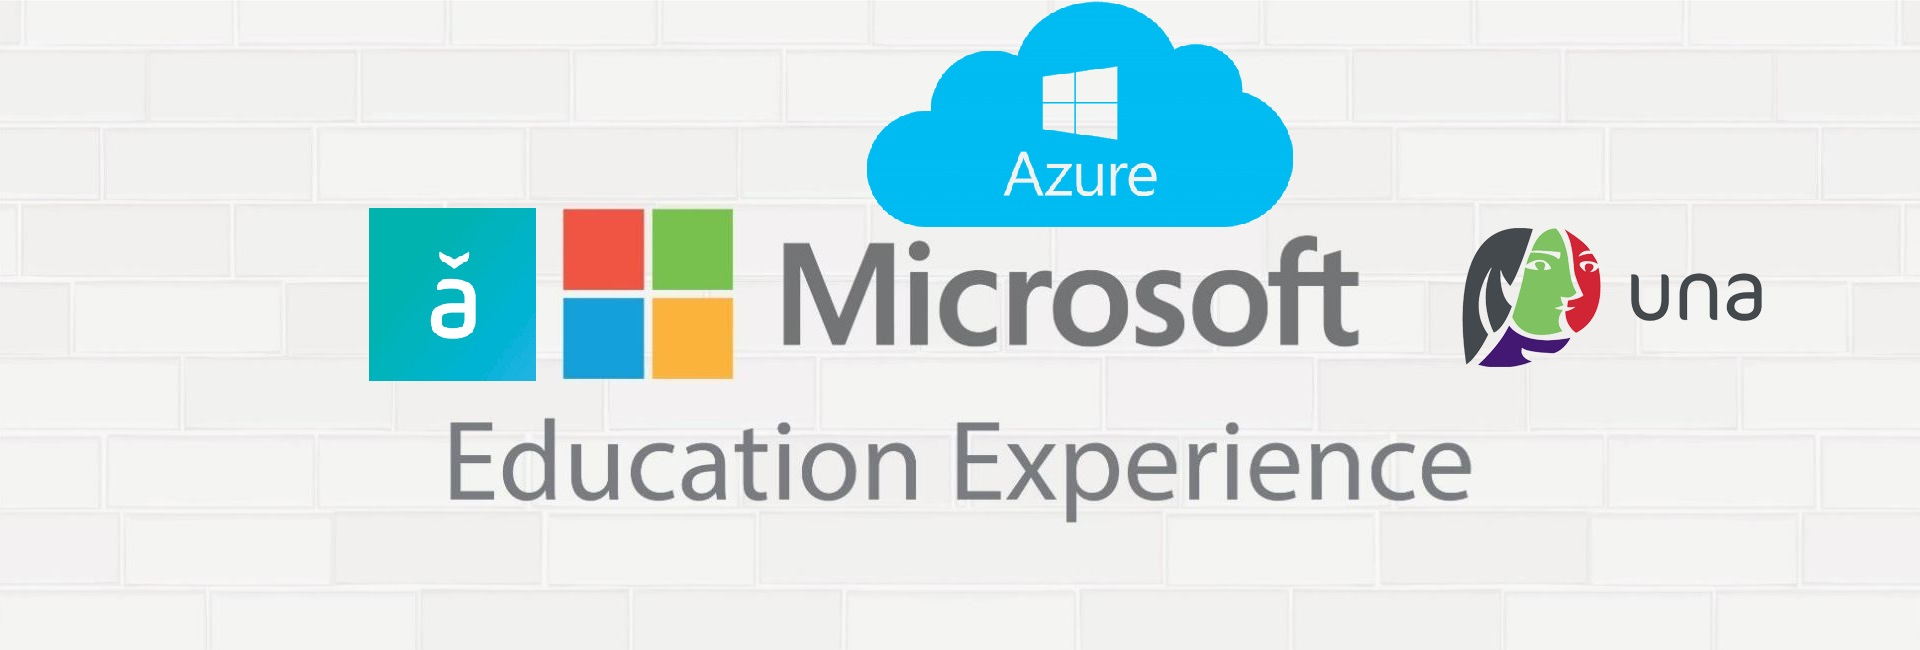

In [54]:
from IPython import display
display.Image("https://i.imgur.com/jxPRyD4.jpeg")

In [2]:
# bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('microdados_enem_2019.csv', sep= ';')

In [4]:
pd.options.display.max_columns = 9999

In [5]:
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,1,2914802.0,Itabuna,29.0,BA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,1,2910800.0,Feira de Santana,29.0,BA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,1,2304400.0,Fortaleza,23.0,CE,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,1,1721000.0,Palmas,17.0,TO,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,0.0,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,1,3118601.0,Contagem,31.0,MG,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0

In [6]:
data.dropna(inplace=True)

In [7]:
print("A base de dados apresenta {} registros e {} variáveis.".format(data.shape[0], data.shape[1]))

A base de dados apresenta 881707 registros e 136 variáveis.


<h1><center>Desafio 1</center></h1>

In [8]:
notas_provas = data[["CO_PROVA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC"]]

In [9]:
notas_provas = notas_provas.rename(columns={'CO_PROVA_MT': 'Matematica', 
                                           'NU_NOTA_CN': 'Ciencias_da_natureza', 
                                           'NU_NOTA_CH': 'Ciencias_humanas',
                                          'NU_NOTA_LC': 'Linguas_e _codigos'})

In [10]:
notas_provas.head(n=10)

,Matematica,Ciencias_da_natureza,Ciencias_humanas,Linguas_e _codigos
26,516.0,618.2,744.7,636.3
28,517.0,430.4,466.8,515.9
31,518.0,371.8,501.4,518.6
34,517.0,567.3,584.1,595.8
55,516.0,385.8,436.3,393.8
56,517.0,389.7,431.1,482.0
83,518.0,427.6,548.8,587.2
96,517.0,510.9,585.4,578.4
100,516.0,361.2,499.0,403.5
105,516.0,556.8,487.0,571.8


In [11]:
relacao_notas = notas_provas.corr()

Text(0.5, 1.0, 'Correlação entre resultados das provas do Enem 2019')

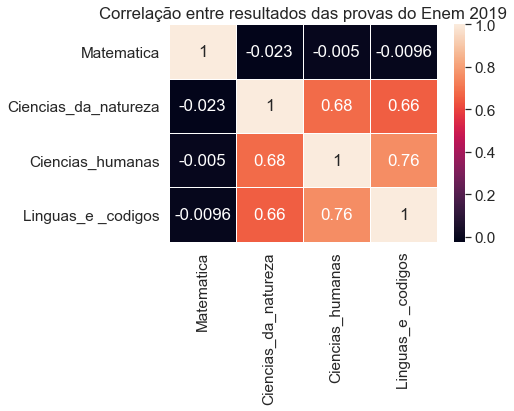

In [12]:
sns.set(font_scale=1.4)
ax = sns.heatmap(relacao_notas, linewidths=.5, annot=True)
ax.set_title('Correlação entre resultados das provas do Enem 2019')

<h1><center>Análise de correlação</center></h1>


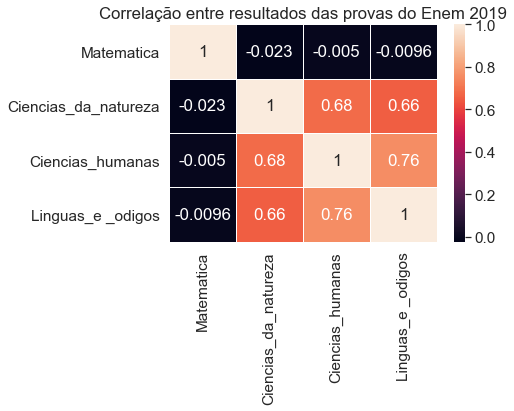


<p> É possível afirmar com base na análise, que existe uma correlação forte e positiva entre os resultados de ciências humanas e Línguas e códigos, e uma correlação moderada entre os resultados das provas de ciencias humanas com ciencias da natureza e entre linguas e códigos e ciências da natureza </p>

<p>Baseado apenas em conhecimento empírico, podemos afirmar que essa correlação vem da aptidão ou gosto dos alunos em focar os estudos em matérias do campo de conhecimento na área de humanas, o que pode ser confirmado beaseado no gráfico que matemática e suas tecnologias apresenta uma correlação irrelevante em comparação com os outros conjuntos de dados.</p>

In [13]:
X = notas_provas['Matematica']
y = notas_provas['Ciencias_da_natureza']

In [14]:
print("Estatísticas descritivas de X:")
X.describe()

Estatísticas descritivas de X:


count    881707.000000
mean        516.509212
std           1.151792
min         515.000000
25%         516.000000
50%         517.000000
75%         518.000000
max         558.000000
Name: Matematica, dtype: float64

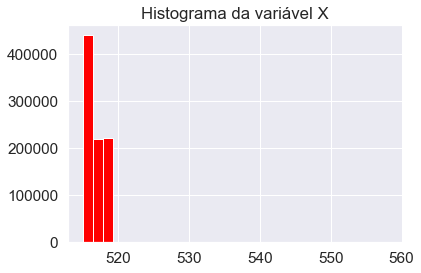

In [15]:
plt.hist(X, color='red', bins=30)
plt.title('Histograma da variável X')
plt.show()

In [16]:
print("Estatísticas descritivas de y:")
y.describe()

Estatísticas descritivas de y:


count    881707.000000
mean        476.125764
std          75.759270
min           0.000000
25%         415.600000
50%         468.500000
75%         532.500000
max         853.500000
Name: Ciencias_da_natureza, dtype: float64

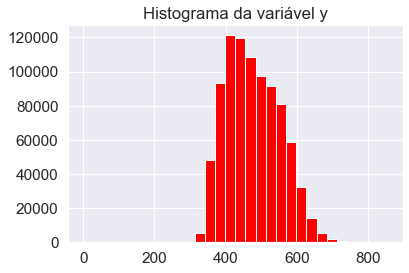

In [17]:
plt.hist(y, color='red', bins=30,)
plt.title('Histograma da variável y')
plt.show()

In [18]:
lm_model = LinearRegression()
lm_model.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [19]:
slope = lm_model.coef_
intercept = lm_model.intercept_

In [20]:
# imprimir os valores encontrados para os parâmetros
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	1260.2919287359387
b1: 	-1.518203637094375


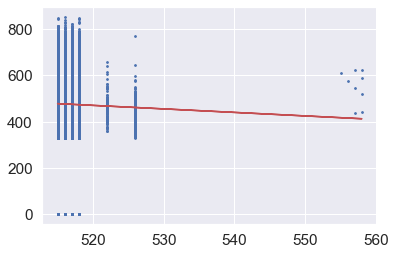

In [21]:
plt.scatter(X, y, s=3)
plt.plot(X, (X * slope + intercept), color='r')
 
plt.show()

<h1><center>Desafio 2</center></h1>

In [22]:
from sklearn.cluster import KMeans

In [23]:
dados_renda_redacao = data[["Q006", "Q025", "NU_NOTA_REDACAO"]]

In [24]:
dados_renda_redacao = dados_renda_redacao.rename(columns={
    'Q006': 'renda_mensal',
    'Q025': 'acesso_a_internet',
    'NU_NOTA_REDACAO': 'nota_redacao'
})

In [25]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(dados_renda_redacao.values)

OneHotEncoder(handle_unknown='ignore')

In [26]:
dados_renda_redacao.head(20)

,renda_mensal,acesso_a_internet,nota_redacao
26,E,B,900.0
28,A,A,580.0
31,B,B,660.0
34,B,B,620.0
55,B,B,260.0
56,B,A,560.0
83,G,A,820.0
96,C,B,880.0
100,B,B,560.0
105,C,A,800.0


In [27]:
x_tudo = encoder.transform(dados_renda_redacao.values).toarray()

In [28]:
renda_internet_X = dados_renda_redacao[['renda_mensal', 'acesso_a_internet']]
encoder.fit(renda_internet_X.values)
x_tudo = encoder.transform(renda_internet_X.values).toarray()
nota_redacao_y = dados_renda_redacao['nota_redacao']

In [29]:
def calcula_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [30]:
df = calcula_wcss(x_tudo)

In [31]:
df

[727454.0566285133,
 587952.9000431898,
 482619.74890927144,
 410246.7686996273,
 355633.33838449506,
 287320.66850288725,
 245892.55099675042,
 212394.7276318997,
 172857.59865803807,
 156858.06050413585,
 125974.02062719456,
 110262.62140047191,
 97786.8159129319,
 89961.93858948685,
 82182.22959569172,
 56328.70552277302,
 48827.732680753434,
 45324.63519264753,
 29095.27278953586]

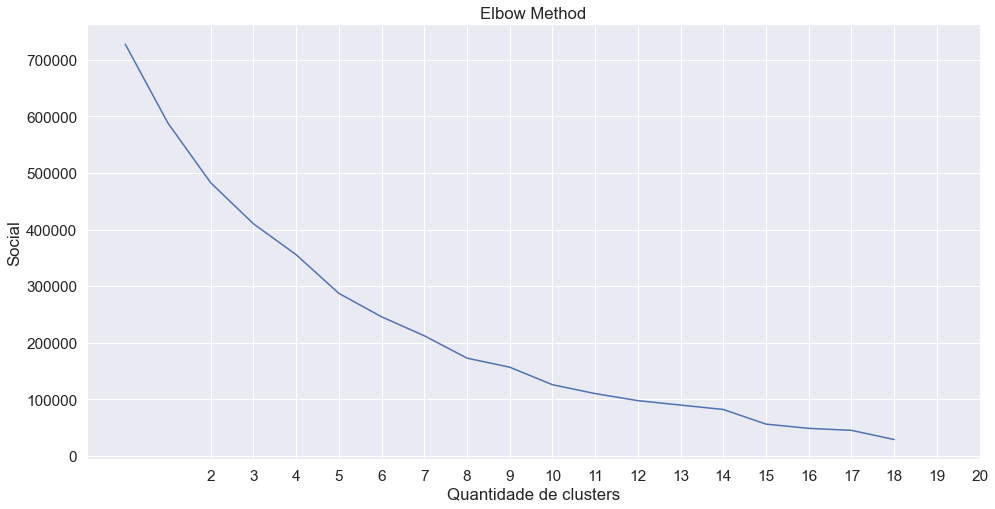

In [32]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.xticks(np.arange(2,21,1))
plt.xlabel('Quantidade de clusters')
plt.ylabel('Social')
plt.title('Elbow Method')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=8, random_state=42)

In [47]:
kmeans.fit(x_tudo)

KMeans(random_state=42)

In [49]:
kmeans.cluster_centers_

array([[ 7.41836192e-02, -2.23709939e-14,  7.89368571e-14,
        -7.17481630e-15, -2.10248485e-14,  1.83844835e-01,
        -2.78249646e-14,  1.69296865e-01,  1.46973601e-01,
         7.37174024e-02,  5.83573126e-02,  4.16687555e-02,
         4.09769498e-02,  5.86731369e-02,  4.74889461e-02,
         4.31827069e-02,  6.16358696e-02, -3.82749388e-14,
         1.00000000e+00],
       [ 1.53768653e-01,  6.95541590e-01, -7.54951657e-15,
         5.85131117e-02,  5.10871250e-02,  1.36049150e-02,
         1.53451604e-02,  5.12209900e-03,  3.20571533e-03,
         1.27524060e-03,  8.66599969e-04,  4.22731692e-04,
         3.66367467e-04,  2.74775600e-04,  2.25456903e-04,
         1.90229261e-04,  1.90229261e-04,  1.00000000e+00,
         2.33257857e-13],
       [-2.06223927e-14, -2.21489493e-14,  1.00000000e+00,
        -7.00828284e-15,  9.20097332e-15, -1.02001740e-14,
        -1.48908663e-14,  9.07607323e-15, -1.59733338e-14,
         4.17374468e-15, -2.47371568e-15,  2.26207941e-15,
    